<br />       

<img src='./images/school_logo.png' alt="Drawing" style="width:300px;float: center"/>   
<br /> 
<br />    
<h1 style='text-align: center;'> Running R Programming Language in Jupyter Notebook</h1>

<h2 style='text-align: center;'> Shouke Wei, Ph.D.</h2>

<br /> 

The Jupyter system supports over 100 programming languages (called “kernels” in the Jupyter ecosystem) including Python, Java, R, Julia, Matlab,Scala, and many more (https://github.com/jupyter/jupyter/wiki/Jupyter-kernels). 

## Objective:
- learn how to run R programming language in Jupyter notebook
    - run R in Jupyter notebook using Python Kernel
    - run R in Jupyter notebook using R kernel

## R Language

R is an interpreted programming language for statistical computing and graphics, which is widely used among statisticians and data miners for developing statistical software and data analysis.

There are several ways to setup Jupyter Notebook for R. We learn two straightforward ways:

## 1. Run R in Jupyter notebook using Python Kernel
This way allows us to run R and Python together in the same notebook.

### (1) Installation Requirements
- Have Python installed in version 3.5 or higher
 - install Anaconda
 - install traditional Python 
- Have R installed in version 3.2 or highger
 - install by installer
 - install by conda  
   `conda install -c r r-essentials`
- Have Jupyter Notebook installed   
 `pip install notebook`   or   
 `conda install notebook`

### (2) Install rpy2 library

- install numpy   
`pip install numpy`  
- install pandas  
 `pip install pandas`
- install rpy2 library  
 `pip install rpy2`  or   
 `conda install rpy2`

In [28]:
# enables the %%R magic,only need run once
%load_ext rpy2.ipython  

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [29]:
%%R
x=6
print(x)

[1] 6


In [50]:
%%R
install.packages('ggplot')

Exception ignored from cffi callback <function _consolewrite_ex at 0x000001A399A97760>:
Traceback (most recent call last):
  File "C:\Users\Administrator.SC-202007221415\AppData\Local\Programs\Python\Python310\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\Administrator.SC-202007221415\AppData\Local\Programs\Python\Python310\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 0: invalid start byte
Exception ignored from cffi callback <function _consolewrite_ex at 0x000001A399A97760>:
Traceback (most recent call last):
  File "C:\Users\Administrator.SC-202007221415\AppData\Local\Programs\Python\Python310\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_

In [41]:
%%R
install.packages('ggplot',repos='http://cran.us.r-project.org', quiet=TRUE)

In [55]:
%%R
library(ggplot2)

### （4） An example

### Python cell

In [52]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'x_var': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'y_var': [3, 5, 7, 6, 9, 8, 10, 12, 13, 11]
})
df

,x_var,y_var
0,0,3
1,1,5
2,2,7
3,3,6
4,4,9
5,5,8
6,6,10
7,7,12
8,8,13
9,9,11


### R cell

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



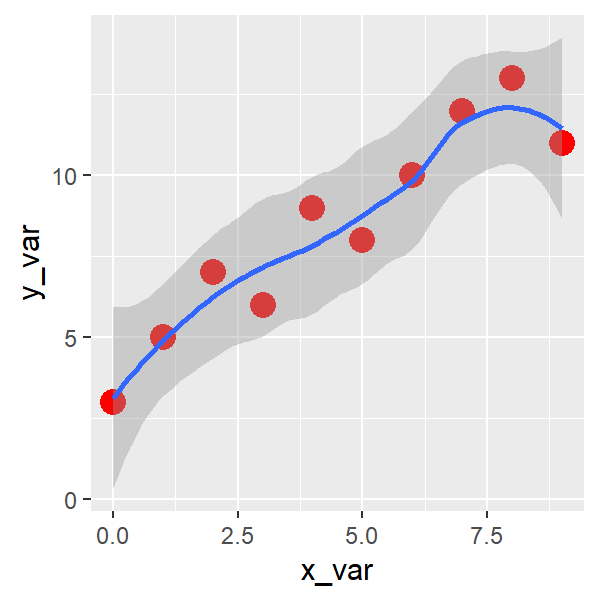

In [56]:
%%R -i df -w 3 -h 3 --units in -r 200
# -i is for "input": means that we pass data df as input to R
# make default figure size 3 by 3 inches with 200 dpi resolution
# units can be changed to px, cm, etc
install.packages('ggplot',repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)

ggplot(data = df, aes(x = x_var, y = y_var)) +
  geom_point(color = 'red', size = 4) +
    stat_smooth()

`%%R` must be at beginning of a cell, otherwise it will cause errors.

In [57]:
# import df from global environment
# make default figure size 3 by 3 inches with 200 dpi resolution
# units can be changed to px, cm, etc
%%R -i df -w 3 -h 3 --units in -r 200

install.packages('ggplot',repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)

ggplot(data = df, aes(x = x_var, y = y_var)) +
  geom_point(color = 'red', size = 4) +
    stat_smooth()

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_4768/2871605531.py, line 9)

## 2. Run R in Jupyter notebook using R kernel

### (1) Install R kernel for Jupyter Notebook via CRAN  
`IRkernel` can be installed via the Comprehensive R Archive Network [CRAN]. 
 
`install.packages('IRkernel')` 

### (2) Making the kernel available to Jupyter

`IRkernel::installspec()` will install a kernel with the name “ir” and a display name of “R”. 

By default, it installs the kernel per-user. To install system-wide, set user to False in the installspec command:   
 `IRkernel::installspec(user = FALSE)` # to register the kernel in the current R installation

### (3) Create R Jupyter Notebook
Creat a new notebook and select R kernel, and copy the following code in the cell.

```R
n <- floor(rnorm(10000, mean = 200, sd = 50))
t <- table(n)
barplot(t)
```

And then run jupyter notebook, and the Jupyter Notebook now supports both Python 3 and R programming languages.